## FBA Community

Author: Arianna Basile, MRC Toxicology Unit, University of Cambridge

__________________________________________________________________________________________________________________
In this tutorial:
<ul>
    <li>Create a small two species community (3.1) </li>
    <li>Learn some basics of pandas to extract metabolite exchanged (3.2)</li>
    <li>Change the medium and compare our results (3.3) </li>
    <li>Predict interactions from carbon sources overlap (3.4) </li>
</ul>

In [1]:
#import the needed packages
import cobra
import os
import micom
import pandas as pd
import matplotlib.pyplot as plt
import math
import logging

logging.getLogger("cobra").setLevel(logging.ERROR)
#enable autocompleting with tab
%config Completer.use_jedi = False

Now we are going to introduce community modelling with the case of study of the relationship between yeast and lactic acid bacteria. First let's do a step back. As you probably remember from what we learnt in the previous notebooks, yeast cannot grow using lactose as only carbon source. Can a lactic acid bacteria as the organims represented by the network (bacteria.xml) grow on this medium? 

In [2]:
model = cobra.io.read_sbml_model("bacteria.xml")
model.optimize()

,fluxes,reduced_costs
12DGR120tipp,0.0,0.0
12DGR140tipp,0.0,0.0
12DGR141tipp,0.0,0.0
12DGR160tipp,0.0,0.0
12DGR161tipp,0.0,0.0
...,...,...
GALt2,0.0,0.0
LCTStex,0.0,0.0
ALATA_L,0.0,0.0
SDPTA,0.0,0.0


In [3]:
with open("media.tsv", "r") as f:
    lines = f.readlines()

data = [line.rstrip().split("\t") for line in lines]
header, *rows = data

medium_dict = {}
for row in rows:
    medium, _, compound, _ = row
    medium_key = medium
    compound_value = "EX_" + compound + "_m"

    medium_dict.setdefault(medium_key, []).append(compound_value)

print(medium_dict.keys())


dict_keys(['CDM35_lcts', 'CDM35_gal', 'CDM35_glc', 'CDM35_low_AA_lcts', 'CDM35_low_AA_gal', 'CDM35_low_AA_glc'])


In [4]:
medium={}
for ele in medium_dict['CDM35_lcts']:
    medium[ele.replace("_m","_e")]=1000
    
ids_reac=[reac.id for reac in model.reactions]
v=list(medium.keys())
for ele in v:
    if ele not in ids_reac:
        medium.pop(ele)

model.medium=medium

model.medium
model.optimize()

,fluxes,reduced_costs
12DGR120tipp,0.0,0.0
12DGR140tipp,0.0,0.0
12DGR141tipp,0.0,0.0
12DGR160tipp,0.0,0.0
12DGR161tipp,0.0,0.0
...,...,...
GALt2,0.0,0.0
LCTStex,0.0,0.0
ALATA_L,0.0,0.0
SDPTA,0.0,0.0


The medium we chose is limiting also for the growth of the bacterium because even if it can metabolise lactose, the medium we chose is a very simple medium without vitamins and with a poor content of aminoacids. But what happens when we combine the yeast and the lactic acid bacterium together? 

The interactions between yeast and lactic acid bacteria (LAB) are multifaceted and crucial in various biological processes, notably in the realms of fermentation and food production. In symbiotic relationships, yeast and LAB often coexist in fermented foods such as sourdough bread, yogurt, and certain types of cheese. One of the key interactions involves metabolic cooperation, where yeast and LAB engage in cross-feeding by utilizing each other's metabolic byproducts. 
Here are some references to delve into LAB-yeast interaction:
<ul>
    <li><a href="https://www.embopress.org/doi/abs/10.15252/msb.202211501">Gabrielli et al., 2023 </a> </li>
    <li><a href="https://www.cell.com/fulltext/S2405-4712(17)30390-3?dgcid=cell.com-slider_referral_cels-slider-Patil_5_4">Ponomarova et al., 2017 </a> </li>
    <li><a href="https://www.sciencedirect.com/science/article/pii/S0740002013000701">Stadie et al., 2013 </a> </li>
</ul>

### 3.1 Community modelling

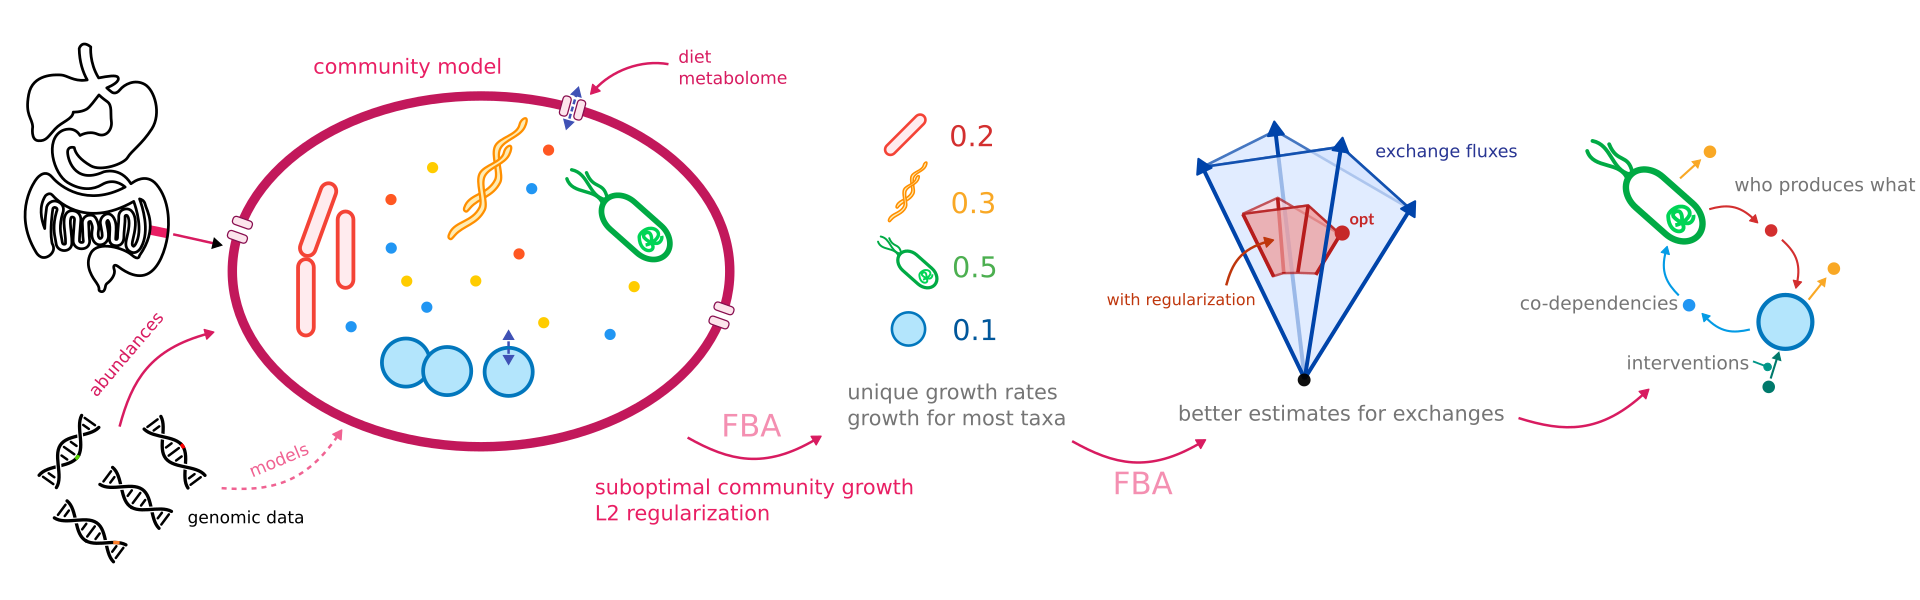

There are many frameworks for microbial modeling and all make their own specific assumptions in order to fit microbial communities into a mathematical representation. This is an overview about the assumptions MICOM makes and how it translates the community into mathematical terms.
In general MICOM makes several assumptions to infer growth rates and fluxes in a microbial community. The most important ones being:
<ul>
<li>Growth rates and relative abundances in the community are in steady state </li>
<li>Most taxa that are present in a biological sample should be able to grow (have a growth rate >0)</li>
<li>Relative DNA abundances can be used as a proxy for dry weight taxa abundances </li>
</ul>

Here is a link to the <a href="https://micom-dev.github.io/micom/index.html">micom documentation</a> 

In [5]:
#get a list of the models we will work on
files = [file for file in os.listdir(".") if file.endswith(".xml")]
print(files)

['yeast.xml', 'bacteria.xml']


In [6]:
# Create a DataFrame with the info you need to create a community in micom
data = {'id': [files[0].replace(".xml", ""), files[1].replace(".xml", "")],
        'file': [files[0], files[1]]}
df = pd.DataFrame(data)

# Create the community with the microbial species listed in the DataFrame
com = micom.Community(df,solver="glpk")


[11:12:36] WARNING  No QP solver found, will use GLPK. A lot of              ]8;id=696477;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py\community.py]8;;\:]8;id=327520;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py#145\145]8;;\
                    functionality in MICOM will require a QP solver :/                       

Output()

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


Inspect the medium. The default medium is a rich medium which maximizes the growth rates of both partners. Therefore, we expect a limited number of exchanges.

In [7]:
com.medium

{'EX_12ppd__S_m': 1000.0,
 'EX_glc__D_m': 1000.0,
 'EX_h2o_m': 1000.0,
 'EX_2dhglcn_m': 1000.0,
 'EX_h_m': 1000.0,
 'EX_2pglyc_m': 1000.0,
 'EX_34dhbz_m': 1000.0,
 'EX_leu__L_m': 1000.0,
 'EX_ala__L_m': 1000.0,
 'EX_cl_m': 1000.0,
 'EX_arab__L_m': 1000.0,
 'EX_4abut_m': 1000.0,
 'EX_acald_m': 1000.0,
 'EX_acgam_m': 1000.0,
 'EX_ac_m': 1000.0,
 'EX_chol_m': 1000.0,
 'EX_pi_m': 1000.0,
 'EX_actn__R_m': 1000.0,
 'EX_adn_m': 1000.0,
 'EX_nh4_m': 1000.0,
 'EX_ade_m': 1000.0,
 'EX_alaala_m': 1000.0,
 'EX_asn__L_m': 1000.0,
 'EX_gly_m': 1000.0,
 'EX_ser__L_m': 1000.0,
 'EX_thr__L_m': 1000.0,
 'EX_arg__L_m': 1000.0,
 'EX_alltn_m': 1000.0,
 'EX_malt_m': 1000.0,
 'EX_malttr_m': 1000.0,
 'EX_anhgm_m': 1000.0,
 'EX_arab__D_m': 1000.0,
 'EX_fe3_m': 1000.0,
 'EX_lys__L_m': 1000.0,
 'EX_orn_m': 1000.0,
 'EX_asp__L_m': 1000.0,
 'EX_phe__L_m': 1000.0,
 'EX_aso3_m': 1000.0,
 'EX_aso4_m': 1000.0,
 'EX_k_m': 1000.0,
 'EX_pro__L_m': 1000.0,
 'EX_cellb_m': 1000.0,
 'EX_bz_m': 1000.0,
 'EX_ca2_m': 1000.0,
 '

Now we want to change the feedstock using pre-defined media.

In [8]:
with open("media.tsv", "r") as f:
    lines = f.readlines()

data = [line.rstrip().split("\t") for line in lines]
header, *rows = data

medium_dict = {}
for row in rows:
    medium, _, compound, _ = row
    medium_key = medium
    compound_value = "EX_" + compound + "_m"

    medium_dict.setdefault(medium_key, []).append(compound_value)

print(medium_dict.keys())


dict_keys(['CDM35_lcts', 'CDM35_gal', 'CDM35_glc', 'CDM35_low_AA_lcts', 'CDM35_low_AA_gal', 'CDM35_low_AA_glc'])


We choose CDM35_gal as our medium for growth of the community 

In [9]:
medium={}
for ele in medium_dict['CDM35_lcts']:
    medium[ele]=1000

com.medium=medium

com.medium

[11:12:41] WARNING  I could not find the following exchanges in your model:  ]8;id=796885;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py\community.py]8;;\:]8;id=792442;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py#669\669]8;;\
                    EX_iodine_m                                                              

{'EX_h2o_m': 1000,
 'EX_h_m': 1000,
 'EX_leu__L_m': 1000,
 'EX_ala__L_m': 1000,
 'EX_cl_m': 1000,
 'EX_pi_m': 1000,
 'EX_nh4_m': 1000,
 'EX_asn__L_m': 1000,
 'EX_gly_m': 1000,
 'EX_ser__L_m': 1000,
 'EX_thr__L_m': 1000,
 'EX_arg__L_m': 1000,
 'EX_fe3_m': 1000,
 'EX_lys__L_m': 1000,
 'EX_orn_m': 1000,
 'EX_asp__L_m': 1000,
 'EX_k_m': 1000,
 'EX_pro__L_m': 1000,
 'EX_ca2_m': 1000,
 'EX_mg2_m': 1000,
 'EX_mn2_m': 1000,
 'EX_cobalt2_m': 1000,
 'EX_zn2_m': 1000,
 'EX_co2_m': 1000,
 'EX_cu2_m': 1000,
 'EX_o2_m': 1000,
 'EX_glu__L_m': 1000,
 'EX_fe2_m': 1000,
 'EX_feenter_m': 1000,
 'EX_his__L_m': 1000,
 'EX_ile__L_m': 1000,
 'EX_met__L_m': 1000,
 'EX_so4_m': 1000,
 'EX_tyr__L_m': 1000,
 'EX_val__L_m': 1000,
 'EX_thm_m': 1000,
 'EX_lcts_m': 1000}

Now we optimize for the community growth 

In [10]:
#let's optimize using the function optimize which doesn't require commercial solvers

sol=com.optimize(fluxes=True)
sol


,abundance,growth_rate,reactions,metabolites
compartments,,,,
bacteria,0.5,1.093580e+01,1642,1157
medium,NaN,NaN,208,208
yeast,0.5,2.898816e-17,1228,937


## Questions
1. We want to filter the matrix sol.fluxes looking for the reactions starting with "EX" which we know representing the exchanges, how would you do? 

In [11]:
#code here



### Tip
The object sol.fluxes is a pandas DataFrame

----------

### 3.2 Using pandas to analyse our results

In [12]:
matrix=sol.fluxes
matrix1=matrix.filter(regex='^EX')
matrix1

reaction,EX_12ppd__S_e,EX_12ppd__S_m,EX_14glucan_e,EX_14glucan_m,EX_23camp_e,EX_23camp_m,EX_23ccmp_e,EX_23ccmp_m,EX_23cgmp_e,EX_23cgmp_m,...,EX_val__L_e,EX_val__L_m,EX_xan_e,EX_xan_m,EX_xyl__D_e,EX_xyl__D_m,EX_xylan4_e,EX_xylan4_m,EX_zn2_e,EX_zn2_m
compartment,,,,,,,,,,,,,,,,,,,,,
bacteria,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,-4.48147,NaN,0.0,NaN,0.0,NaN,0.0,NaN,-3.611339e-03,NaN
medium,NaN,-0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,-2.243785,NaN,0.0,NaN,0.0,NaN,0.0,NaN,-0.001806
yeast,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.00610,NaN,NaN,NaN,0.0,NaN,NaN,NaN,-9.572786e-21,NaN


After finding the exchanges we want to highlight the compounds produced by the bacterium and absorbed by the yeast or the other way around to underline the main exchanges

In [13]:
# Filter columns for "iMM904" with values lower than 0
#condition_iMM904 = (matrix1.loc['iMM904'] < 0)
condition_bacteria = (matrix1.loc['bacteria'] < -0.01)

# Filter columns for "iNF517" with values higher than 0
#condition_iNF517 = (matrix1.loc['iNF517'] > 0)
condition_yeast = (matrix1.loc['yeast'] > 0.01)

# Combine the conditions using logical AND (&) 
selected_dataframe_1 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]


selected_dataframe_1



reaction,EX_glu__L_e
compartment,
bacteria,-100.000000
medium,NaN
yeast,45.412287


In [14]:
# Filter columns for bacteria and yeast
condition_bacteria = (matrix1.loc['bacteria'] > 0.01)

condition_yeast = (matrix1.loc['yeast'] < -0.01)

# Combine the conditions using logical AND (&)
selected_dataframe_2 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]

selected_dataframe_2

reaction,EX_gal_e
compartment,
bacteria,0.084035
medium,NaN
yeast,-0.084035


Unlike in the single species simulations, here the yeast can grow on lactose but only because it is helped by the bacterium which metabolises the lactose to galactose and glucose. The galactose is then taken by the yeast.

In [15]:
# Concatenate along columns (horizontally)
concatenated_df = pd.concat([selected_dataframe_1, selected_dataframe_2], axis=1)

print("Concatenated DataFrame along columns:")
concatenated_df_nomedia = concatenated_df.drop('medium')
concatenated_df_nomedia

Concatenated DataFrame along columns:


reaction,EX_glu__L_e,EX_gal_e
compartment,,
bacteria,-100.000000,0.084035
yeast,45.412287,-0.084035


Let's play with matplotlib to represent grafically the results

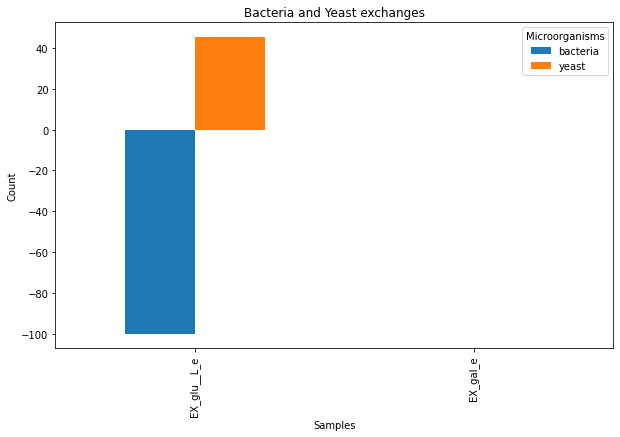

In [16]:
# Plotting a bar plot
ax = concatenated_df_nomedia.T.plot(kind='bar', figsize=(10, 6))
plt.title('Bacteria and Yeast exchanges')
plt.xlabel('Samples')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.legend(title='Microorganisms', loc='upper right')
plt.show()

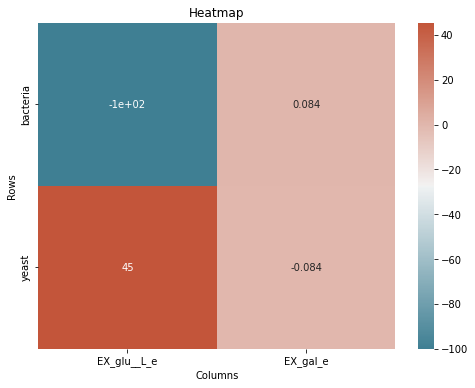

In [17]:
import seaborn as sns
# Create heatmap
plt.figure(figsize=(8, 6))  # Adjust the size of the figure as needed
palette = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(concatenated_df_nomedia, annot=True, cmap=palette)  # Annotate cells with values and choose colormap
plt.title('Heatmap')  # Add title
plt.xlabel('Columns')  # Add label for x-axis
plt.ylabel('Rows')  # Add label for y-axis
plt.show()

## Questions
1. Check if the lactose is absorbed by the bacterium as we expect. Can you do it with one line code? 

## Solution

In [18]:
matrix1["EX_lcts_e"]

compartment
bacteria   -100.0
medium        NaN
yeast         NaN
Name: EX_lcts_e, dtype: float64

### 3.3 Change the medium and compare our results

In [19]:
medium={}
for ele in medium_dict['CDM35_gal']:
    medium[ele]=1000
com.medium=medium

com.medium

[11:12:42] WARNING  I could not find the following exchanges in your model:  ]8;id=358621;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py\community.py]8;;\:]8;id=812687;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py#669\669]8;;\
                    EX_iodine_m                                                              

{'EX_h2o_m': 1000,
 'EX_h_m': 1000,
 'EX_leu__L_m': 1000,
 'EX_ala__L_m': 1000,
 'EX_cl_m': 1000,
 'EX_pi_m': 1000,
 'EX_nh4_m': 1000,
 'EX_asn__L_m': 1000,
 'EX_gly_m': 1000,
 'EX_arg__L_m': 1000,
 'EX_fe3_m': 1000,
 'EX_orn_m': 1000,
 'EX_asp__L_m': 1000,
 'EX_k_m': 1000,
 'EX_ca2_m': 1000,
 'EX_mg2_m': 1000,
 'EX_mn2_m': 1000,
 'EX_cobalt2_m': 1000,
 'EX_zn2_m': 1000,
 'EX_co2_m': 1000,
 'EX_cu2_m': 1000,
 'EX_o2_m': 1000,
 'EX_glu__L_m': 1000,
 'EX_fe2_m': 1000,
 'EX_feenter_m': 1000,
 'EX_gal_m': 1000,
 'EX_his__L_m': 1000,
 'EX_ile__L_m': 1000,
 'EX_met__L_m': 1000,
 'EX_so4_m': 1000,
 'EX_tyr__L_m': 1000,
 'EX_val__L_m': 1000,
 'EX_thm_m': 1000}

In [20]:
sol=com.optimize(fluxes=True)
sol

,abundance,growth_rate,reactions,metabolites
compartments,,,,
bacteria,0.5,7.177319,1642,1157
medium,NaN,NaN,208,208
yeast,0.5,2.731211,1228,937


In [21]:
matrix=sol.fluxes
matrix1=matrix.filter(regex='^EX')
matrix1

reaction,EX_12ppd__S_e,EX_12ppd__S_m,EX_14glucan_e,EX_14glucan_m,EX_23camp_e,EX_23camp_m,EX_23ccmp_e,EX_23ccmp_m,EX_23cgmp_e,EX_23cgmp_m,...,EX_val__L_e,EX_val__L_m,EX_xan_e,EX_xan_m,EX_xyl__D_e,EX_xyl__D_m,EX_xylan4_e,EX_xylan4_m,EX_zn2_e,EX_zn2_m
compartment,,,,,,,,,,,,,,,,,,,,,
bacteria,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,-2.941252,NaN,0.0,NaN,0.0,NaN,0.0,NaN,-0.002370,NaN
medium,NaN,-0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,-2.033012,NaN,0.0,NaN,0.0,NaN,0.0,NaN,-0.001636
yeast,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.124772,NaN,NaN,NaN,0.0,NaN,NaN,NaN,-0.000902,NaN


In [22]:
condition_bacteria = (matrix1.loc['bacteria'] < -0.01)

condition_yeast = (matrix1.loc['yeast'] > 0.01)

# Combine the conditions using logical AND (&) 
selected_dataframe_1 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]
selected_dataframe_1

reaction
compartment
bacteria
medium
yeast


In [23]:

condition_bacteria = (matrix1.loc['bacteria'] > 0.01)

condition_yeast = (matrix1.loc['yeast'] < -0.01)

# Combine the conditions using logical AND (&)
selected_dataframe_2 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]

selected_dataframe_2


reaction,EX_ac_e,EX_phe__L_e,EX_ser__L_e,EX_trp__L_e
compartment,,,,
bacteria,391.429065,0.490018,3.267356,0.150347
medium,NaN,NaN,NaN,NaN
yeast,-0.459783,-0.490018,-3.267356,-0.150347


In [24]:
# Concatenate along columns (horizontally)
concatenated_df = pd.concat([selected_dataframe_1, selected_dataframe_2], axis=1)

print("Concatenated DataFrame along columns:")
concatenated_df_nomedia = concatenated_df.drop('medium')
concatenated_df_nomedia

Concatenated DataFrame along columns:


reaction,EX_ac_e,EX_phe__L_e,EX_ser__L_e,EX_trp__L_e
compartment,,,,
bacteria,391.429065,0.490018,3.267356,0.150347
yeast,-0.459783,-0.490018,-3.267356,-0.150347


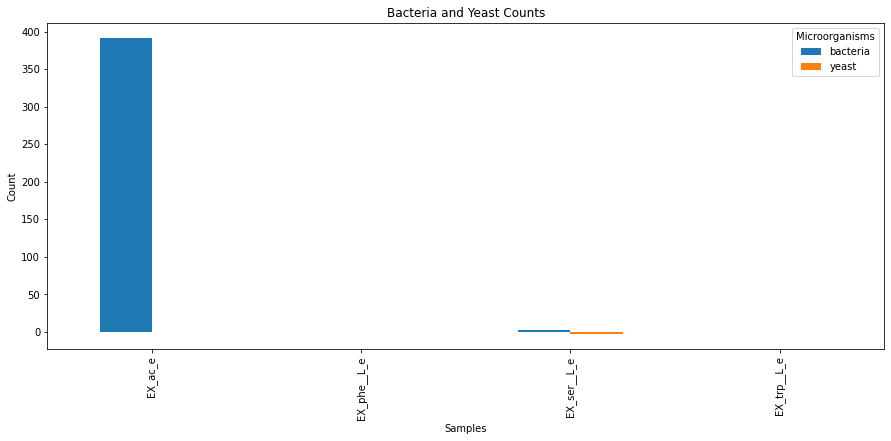

In [25]:
# Plotting a bar plot
ax = concatenated_df_nomedia.T.plot(kind='bar', figsize=(15, 6))
plt.title('Bacteria and Yeast Counts')
plt.xlabel('Samples')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.legend(title='Microorganisms', loc='upper right')
plt.show()

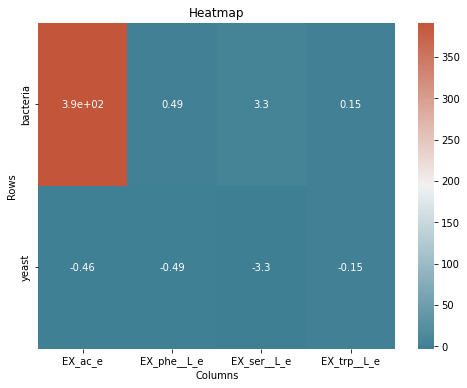

In [26]:
plt.figure(figsize=(8, 6))  # Adjust the size of the figure as needed
palette = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(concatenated_df_nomedia, annot=True, cmap=palette)  # Annotate cells with values and choose colormap
plt.title('Heatmap')  # Add title
plt.xlabel('Columns')  # Add label for x-axis
plt.ylabel('Rows')  # Add label for y-axis
plt.show()

## Questions
1. Edit the medium considering an environment poor in aminoacids. What do you expect to see in your simulations? Why?

In [27]:
#type your code here

## Solution

[11:12:43] WARNING  I could not find the following exchanges in your model:  ]8;id=990621;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py\community.py]8;;\:]8;id=561698;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py#669\669]8;;\
                    EX_iodine_m                                                              

Concatenated DataFrame along columns:


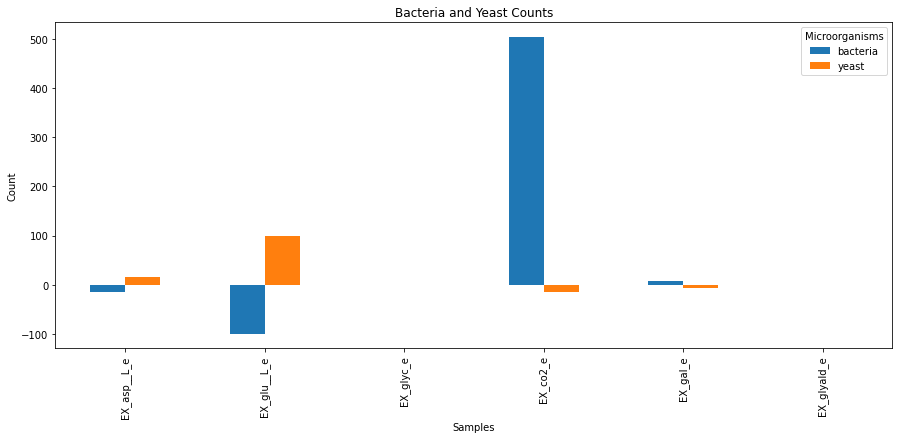

In [28]:
medium={}
for ele in medium_dict['CDM35_low_AA_lcts']:
    medium[ele]=1000
com.medium=medium

com.medium
sol=com.optimize(fluxes=True)
sol
matrix=sol.fluxes
matrix1=matrix.filter(regex='^EX')
matrix1

condition_bacteria = (matrix1.loc['bacteria'] < -0.01)
condition_yeast = (matrix1.loc['yeast'] > 0.01)

# Combine the conditions using logical AND (&) 
selected_dataframe_1 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]
selected_dataframe_1

condition_bacteria = (matrix1.loc['bacteria'] > 0.01)
condition_yeast = (matrix1.loc['yeast'] < -0.01)

# Combine the conditions using logical AND (&)
selected_dataframe_2 = matrix1.loc[:,((condition_bacteria) & (condition_yeast))]
selected_dataframe_2

# Concatenate along columns (horizontally)
concatenated_df = pd.concat([selected_dataframe_1, selected_dataframe_2], axis=1)

print("Concatenated DataFrame along columns:")
concatenated_df_nomedia = concatenated_df.drop('medium')
concatenated_df_nomedia

# Plotting a bar plot
ax = concatenated_df_nomedia.T.plot(kind='bar', figsize=(15, 6))
plt.title('Bacteria and Yeast Counts')
plt.xlabel('Samples')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.legend(title='Microorganisms', loc='upper right')
plt.show()

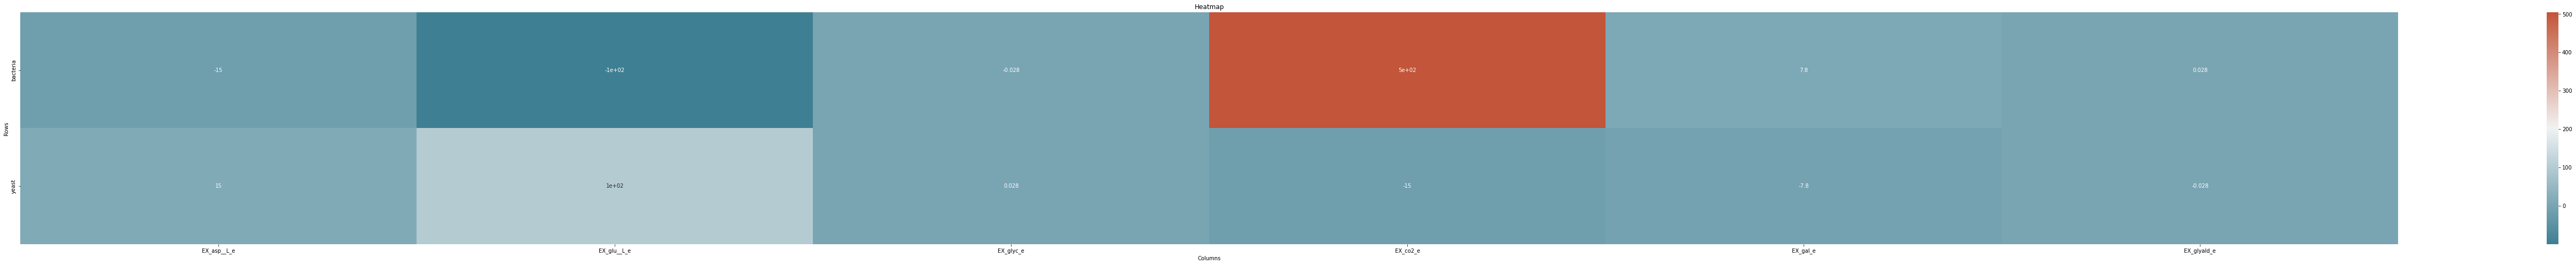

In [29]:
plt.figure(figsize=(100, 8))  # Adjust the size of the figure as needed
palette = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(concatenated_df_nomedia, annot=True, cmap=palette)  # Annotate cells with values and choose colormap
plt.title('Heatmap')  # Add title
plt.xlabel('Columns')  # Add label for x-axis
plt.ylabel('Rows')  # Add label for y-axis
plt.show()

In [30]:
sol

,abundance,growth_rate,reactions,metabolites
compartments,,,,
bacteria,0.5,8.759353e+00,1642,1157
medium,NaN,NaN,208,208
yeast,0.5,4.883192e-16,1228,937


## Other types of interactions

<a href=https://www.science.org/doi/full/10.1126/science.adf5121>Schäfer</a> et al. investigated the carbon preferences of 224 bacterial strains found on plant leaves and employed metabolic genome-scale models to simulate interactions between pairs of microbes. They discovered that most interactions were negative, resulting in reduced growth when bacteria were paired compared to when they grew individually. However, metabolic analyses revealed that certain versatile strains, particularly those adept at utilizing amino acids and organic acids, could occasionally exhibit positive interactions. This study offers insights that could facilitate the design of synthetic microbial communities tailored to specific substrates.

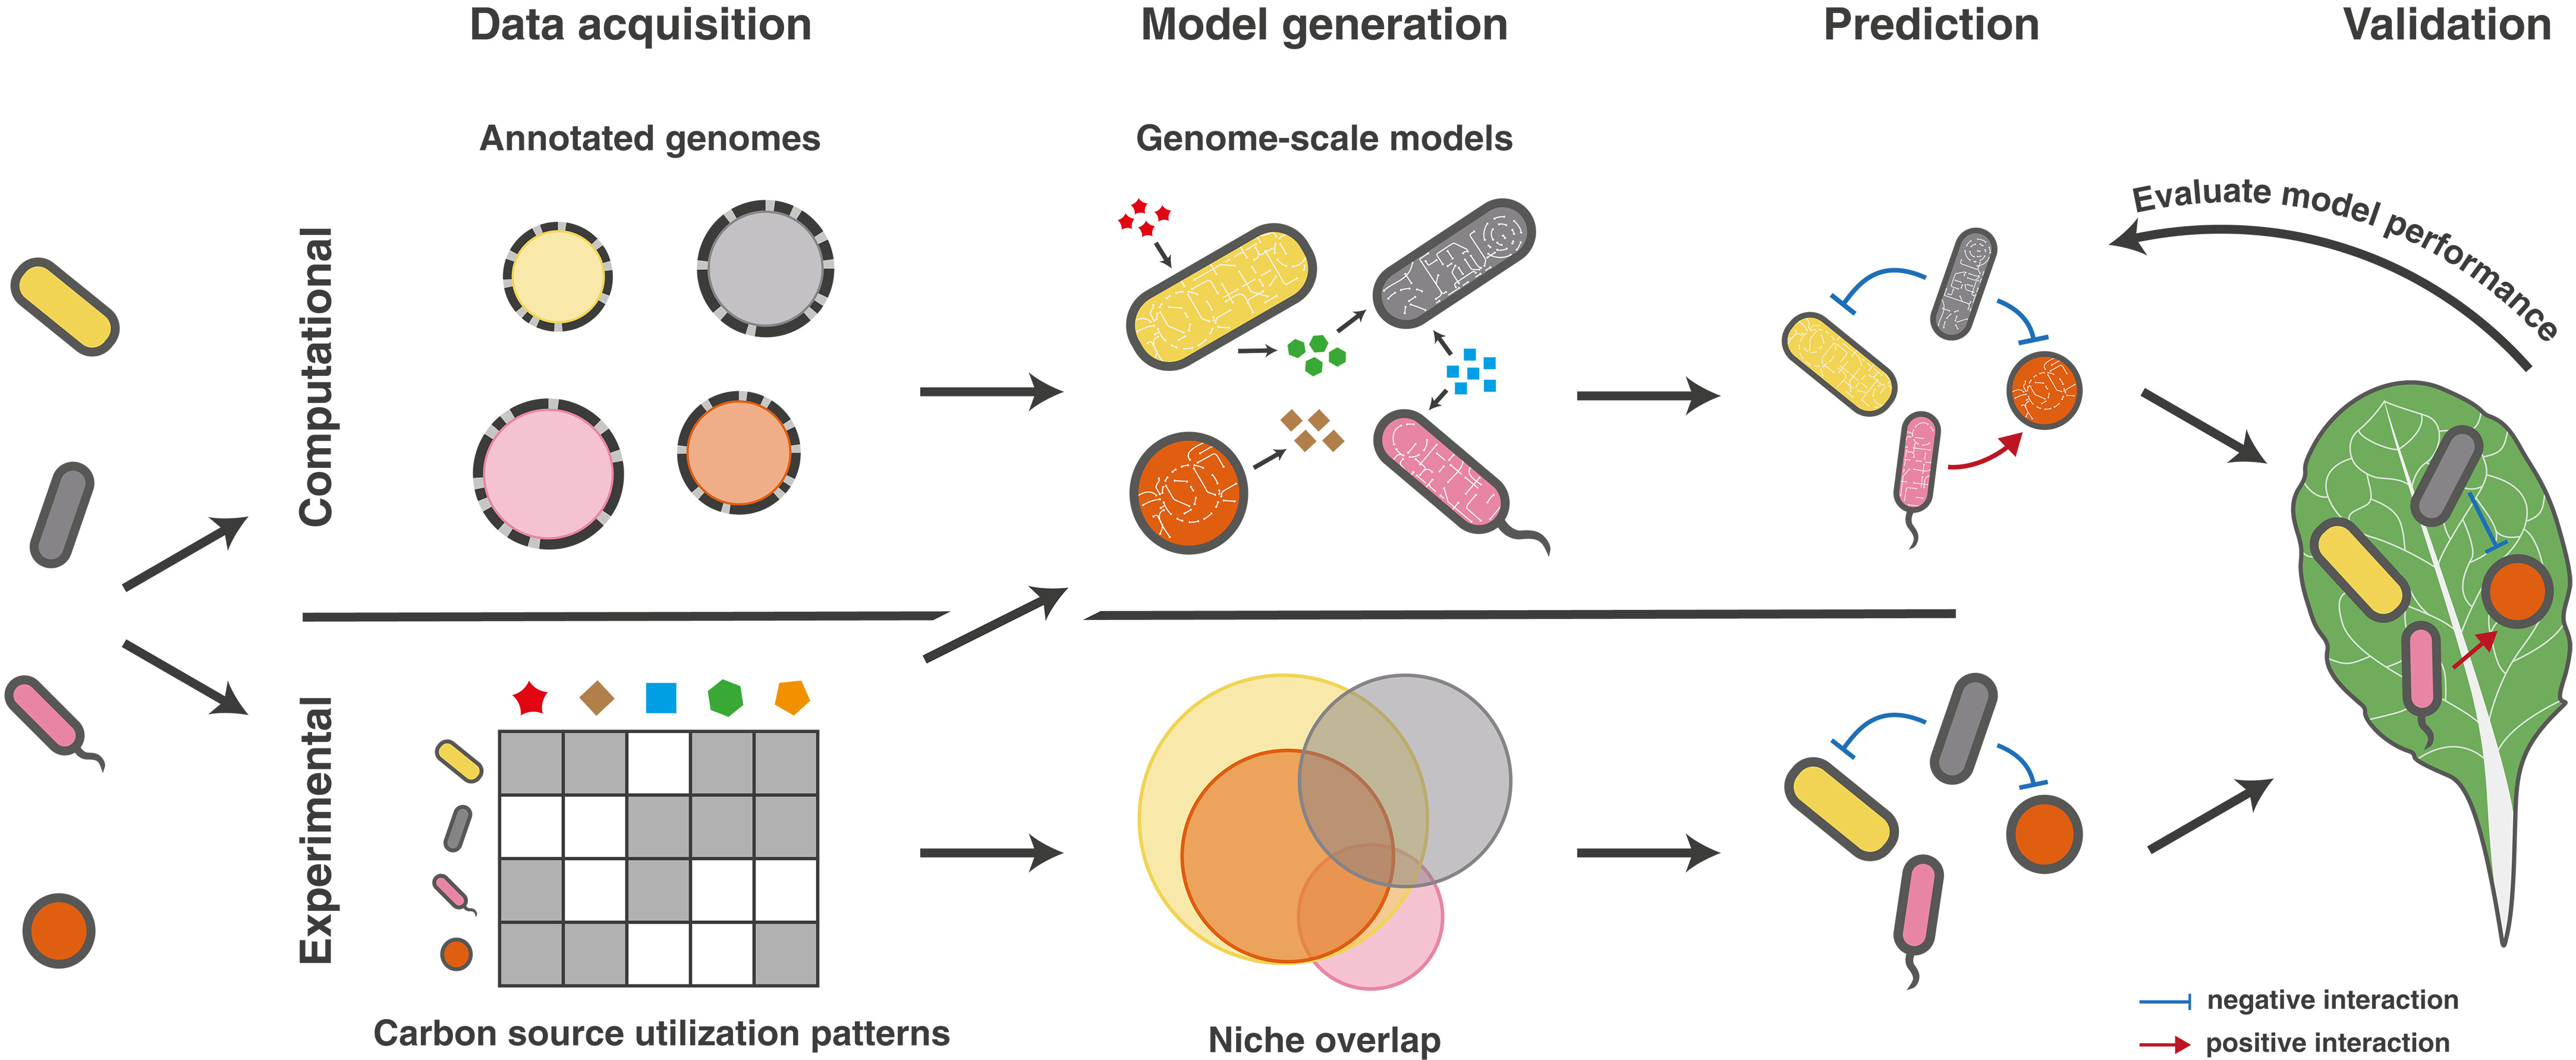

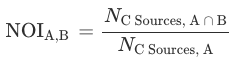

"We calculated NOI values for all pairs of strains, setting a threshold of 75% as likely prone to competitive exclusion (57) (Fig. 2D). In accordance with the similar carbon source– utilization profiles, we found high niche overlap within most genera, suggesting frequent intragenus competitive interactions."

## 3.4 Excercise using two organisms of interest

For this excercise I selected Leaf179 and Leaf257. If you want to try with other microbes, you can download them from https://github.com/VorholtLab/i-At-LSPHERE/tree/main and try the same analysis with the new organisms

### First part

In [31]:
#I chose Leaf179 and Leaf257
#get a list of the models we will work on

In [32]:
# Create a DataFrame with the info you need to create a community in micom

# Create the community with the microbial species listed in the DataFrame

In [33]:
#optimize the growth rate of the community 

In [34]:
#check the growth rates of the single organisms

In [35]:
#compare if sol.growth_rates with sol_179 and sol_257

### Second part

In [36]:
#we import the file carbon_sources.tsv and store the ids of our carbon sources in a vector

In [37]:
#we select one model and define the minimal medium (cobra.medium.minimal_medium) of our model. We give the minimal medium as feeding source and then add one by one the carbon sources
#if the carbon source can be used by the bacterium, we store the carbon source in a vector

In [38]:
#we do the same for the other model

In [39]:
#we write two small functions NOIAB and NOIBA to analyse the overlap of the carbon sources

In [40]:
#if NOIBA and NOIAB are higher than 0.75 we define a negative interplay as detailed in the article

### Solution

### First part

In [41]:
#get a list of the models we will work on
files = [file for file in os.listdir("Leaf/") if file.endswith(".xml")]
print(files)

['Leaf179.xml', 'Leaf257.xml']


In [42]:
# Create a DataFrame with the info you need to create a community in micom
data = {'id': [files[0].replace(".xml", ""), files[1].replace(".xml", "")],
        'file': ["Leaf/"+files[0], "Leaf/"+files[1]]}
df = pd.DataFrame(data)

# Create the community with the microbial species listed in the DataFrame
com = micom.Community(df,solver="glpk",progress=False)


[11:12:44] WARNING  No QP solver found, will use GLPK. A lot of              ]8;id=7616;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py\community.py]8;;\:]8;id=930960;file:///Users/arianna/miniconda3/envs/carve_fungi/lib/python3.8/site-packages/micom/community.py#145\145]8;;\
                    functionality in MICOM will require a QP solver :/                       

In [43]:
sol=com.optimize(fluxes=True)
sol

,abundance,growth_rate,reactions,metabolites
compartments,,,,
Leaf179,0.5,66.798686,2090,1413
Leaf257,0.5,14.676815,2165,1450
medium,NaN,NaN,314,314


In [44]:
Leaf179 = cobra.io.read_sbml_model("Leaf/Leaf179.xml")
sol_179 = Leaf179.optimize()
sol_179

,fluxes,reduced_costs
12DGR140tipp,0.0,0.000000
12DGR160tipp,0.0,0.000000
12DGR180tipp,0.0,0.000000
12DGR181tipp,0.0,0.000000
12PPDRDH,0.0,0.000000
...,...,...
r2465_1,0.0,-0.034154
r1143,0.0,-0.018785
ACt2r,0.0,-0.033585
EX_co2_e,1000.0,0.000000


In [ ]:
Leaf257 = cobra.io.read_sbml_model("Leaf/Leaf257.xml")
sol_257 = Leaf257.optimize()
sol_257

In [ ]:
if 2*sol_257.objective_value<sol.growth_rate:
    print("Leaf257 benefits from the coexistence")
else:
    print("Leaf257 suffers from the coexistence")

In [ ]:
if 2*sol_179.objective_value<sol.growth_rate:
    print("Leaf179 benefits from the coexistence")
else:
    print("Leaf179 suffers from the coexistence")

### Second part

In [ ]:
df=pd.read_csv("carbon_sources.tsv",sep="\t")
carbon_sources = df.iloc[:, 1].tolist()

In [ ]:
mm179=cobra.medium.minimal_medium(Leaf179)
mm179
Leaf179.medium=mm179
Leaf179.optimize()

In [ ]:
mm257=cobra.medium.minimal_medium(Leaf257)
mm257
Leaf257.medium=mm257
Leaf257.optimize()

In [ ]:
carbon_sources_179=[]
with Leaf179 as Leaf179:
    for ele in carbon_sources:
        mm179=cobra.medium.minimal_medium(Leaf179)
        mm179["EX_"+ele+"_e"]=100
        try:
            Leaf179.medium=mm179
            sol=Leaf179.optimize()
            carbon_sources_179.append(ele)
        except:
            continue

In [ ]:
carbon_sources_257=[]
with Leaf257 as Leaf257:
    for ele in carbon_sources:
        mm257=cobra.medium.minimal_medium(Leaf257)
        mm257["EX_"+ele+"_e"]=100
        try:
            Leaf257.medium=mm257
            sol=Leaf257.optimize()
            carbon_sources_257.append(ele)
        except:
            continue
        

In [ ]:
intersection = list(set(carbon_sources_179).intersection(set(carbon_sources_257)))


In [ ]:
NOIAB = len(intersection)/len(carbon_sources_179)
NOIAB = f"{NOIAB:.2f}"
NOIAB

In [ ]:
NOIBA = len(intersection)/len(carbon_sources_257)
NOIBA = f"{NOIBA:.2f}"
NOIBA

----